# Librerías

In [1]:
''' 
    * Autor: Octavio Augusto Alemán Esparza
    * Fecha: 6 de noviembre del 2023
    * Archivo: clustering.ipynb
    * Descripción: Archivo con funciones de clustering para modelado de atributos.
'''

import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

import itertools

import warnings
warnings.filterwarnings('ignore')

# Importar el Dataset

In [2]:
df = pd.read_csv('./data/Liverpool_Predictiva.csv')
df.head(5)

,Unnamed: 0,Edad ingreso,Antigüedad,No. Hijos,Función,Ubicación,Genero,Estado,Posiciones totales,Movimientos reales,Promedio dias en posicion,Clase
0,0,29.0,0.0,1.0,Auxiliar Armador,CeDis Regional Tacubaya,Hombre,NaN,2.0,1,920.0,Renuncia
1,1,25.0,0.0,0.0,Operador Camioneta,CeDis Regional Tacubaya,Hombre,NaN,2.0,1,937.0,Renuncia
2,2,39.0,0.0,3.0,Inteligencia Operativa,CeDis Regional Tacubaya,Mujer,NaN,2.0,1,928.0,Renuncia
3,3,22.0,0.0,0.0,Personal Operativo,CeDis Regional Tacubaya,Hombre,NaN,2.0,1,903.5,Renuncia
4,4,18.0,0.0,0.0,Personal Operativo,CeDis Regional Tacubaya,Hombre,NaN,2.0,1,934.0,Renuncia


# Limpieza
*  Se deben eliminar previamente todos los valores nulos

In [3]:
df = df.dropna()

# Ajuste de datos

In [4]:
# Conversión de columnas categóricas a numericas
def dataToNumeric(df):

    df_categoric = df.select_dtypes(exclude= ['number'])

    label_encoder = LabelEncoder()
    for col in range (0, len(df_categoric.columns)):
        df[df_categoric.columns[col]] = label_encoder.fit_transform(df[df_categoric.columns[col]])

    return df

df = dataToNumeric(df)

# Visualización de resultados
df.head(5)

,Unnamed: 0,Edad ingreso,Antigüedad,No. Hijos,Función,Ubicación,Genero,Estado,Posiciones totales,Movimientos reales,Promedio dias en posicion,Clase
54,54,41.0,0.0,0.0,190,378,1,6,2.0,1,898.5,1
55,55,20.0,0.0,0.0,190,378,3,6,2.0,1,898.5,1
56,56,18.0,0.0,0.0,190,378,3,6,2.0,1,905.0,1
57,57,29.0,0.0,0.0,914,378,1,6,2.0,1,907.0,1
58,58,49.0,0.0,0.0,190,378,3,6,2.0,1,905.0,1


# Selección de datos

In [5]:
# Seleccionar todas las columnas menos la primera, séptima, octava y última
columns_to_drop = [0, 6, 7, len(df.columns) - 1]
df = df.drop(df.columns[columns_to_drop], axis=1)

# Selección de datos
X = df.iloc[:, [len(df.columns) - 1, len(df.columns) - 2]].values

# Método del codo
Para la selección del número óptimo de clusters

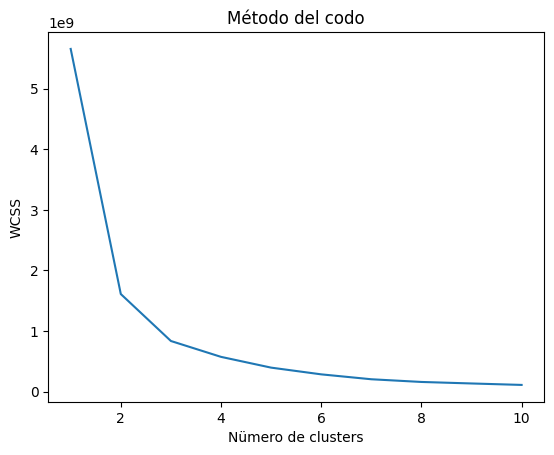

In [6]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Método del codo')
plt.xlabel('Nümero de clusters')
plt.ylabel('WCSS')
plt.show()

# Entrenamiento del Modelo K-Means

In [7]:
# Definicion del número de clusters de acuerdo al método del codo
n_clusters = 3

kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', random_state = 42)
y_means = kmeans.fit_predict(X)

# Visualización de los clusters

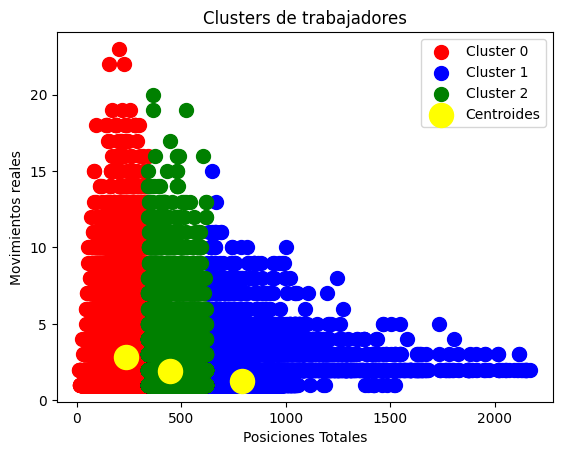

In [8]:
colors = ['red', 'blue', 'green', 'cyan', 'magenta']

for i in range(0, n_clusters):
    plt.scatter(X[y_means == i, 0], X[y_means == i, 1], s = 100, c = colors[i], label = f'Cluster {i}')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroides')
plt.title('Clusters de trabajadores')
plt.xlabel('Posiciones Totales')
plt.ylabel('Movimientos reales')
plt.legend()
plt.show()

# Visualización de todos los clusters
* Clustering K-Means

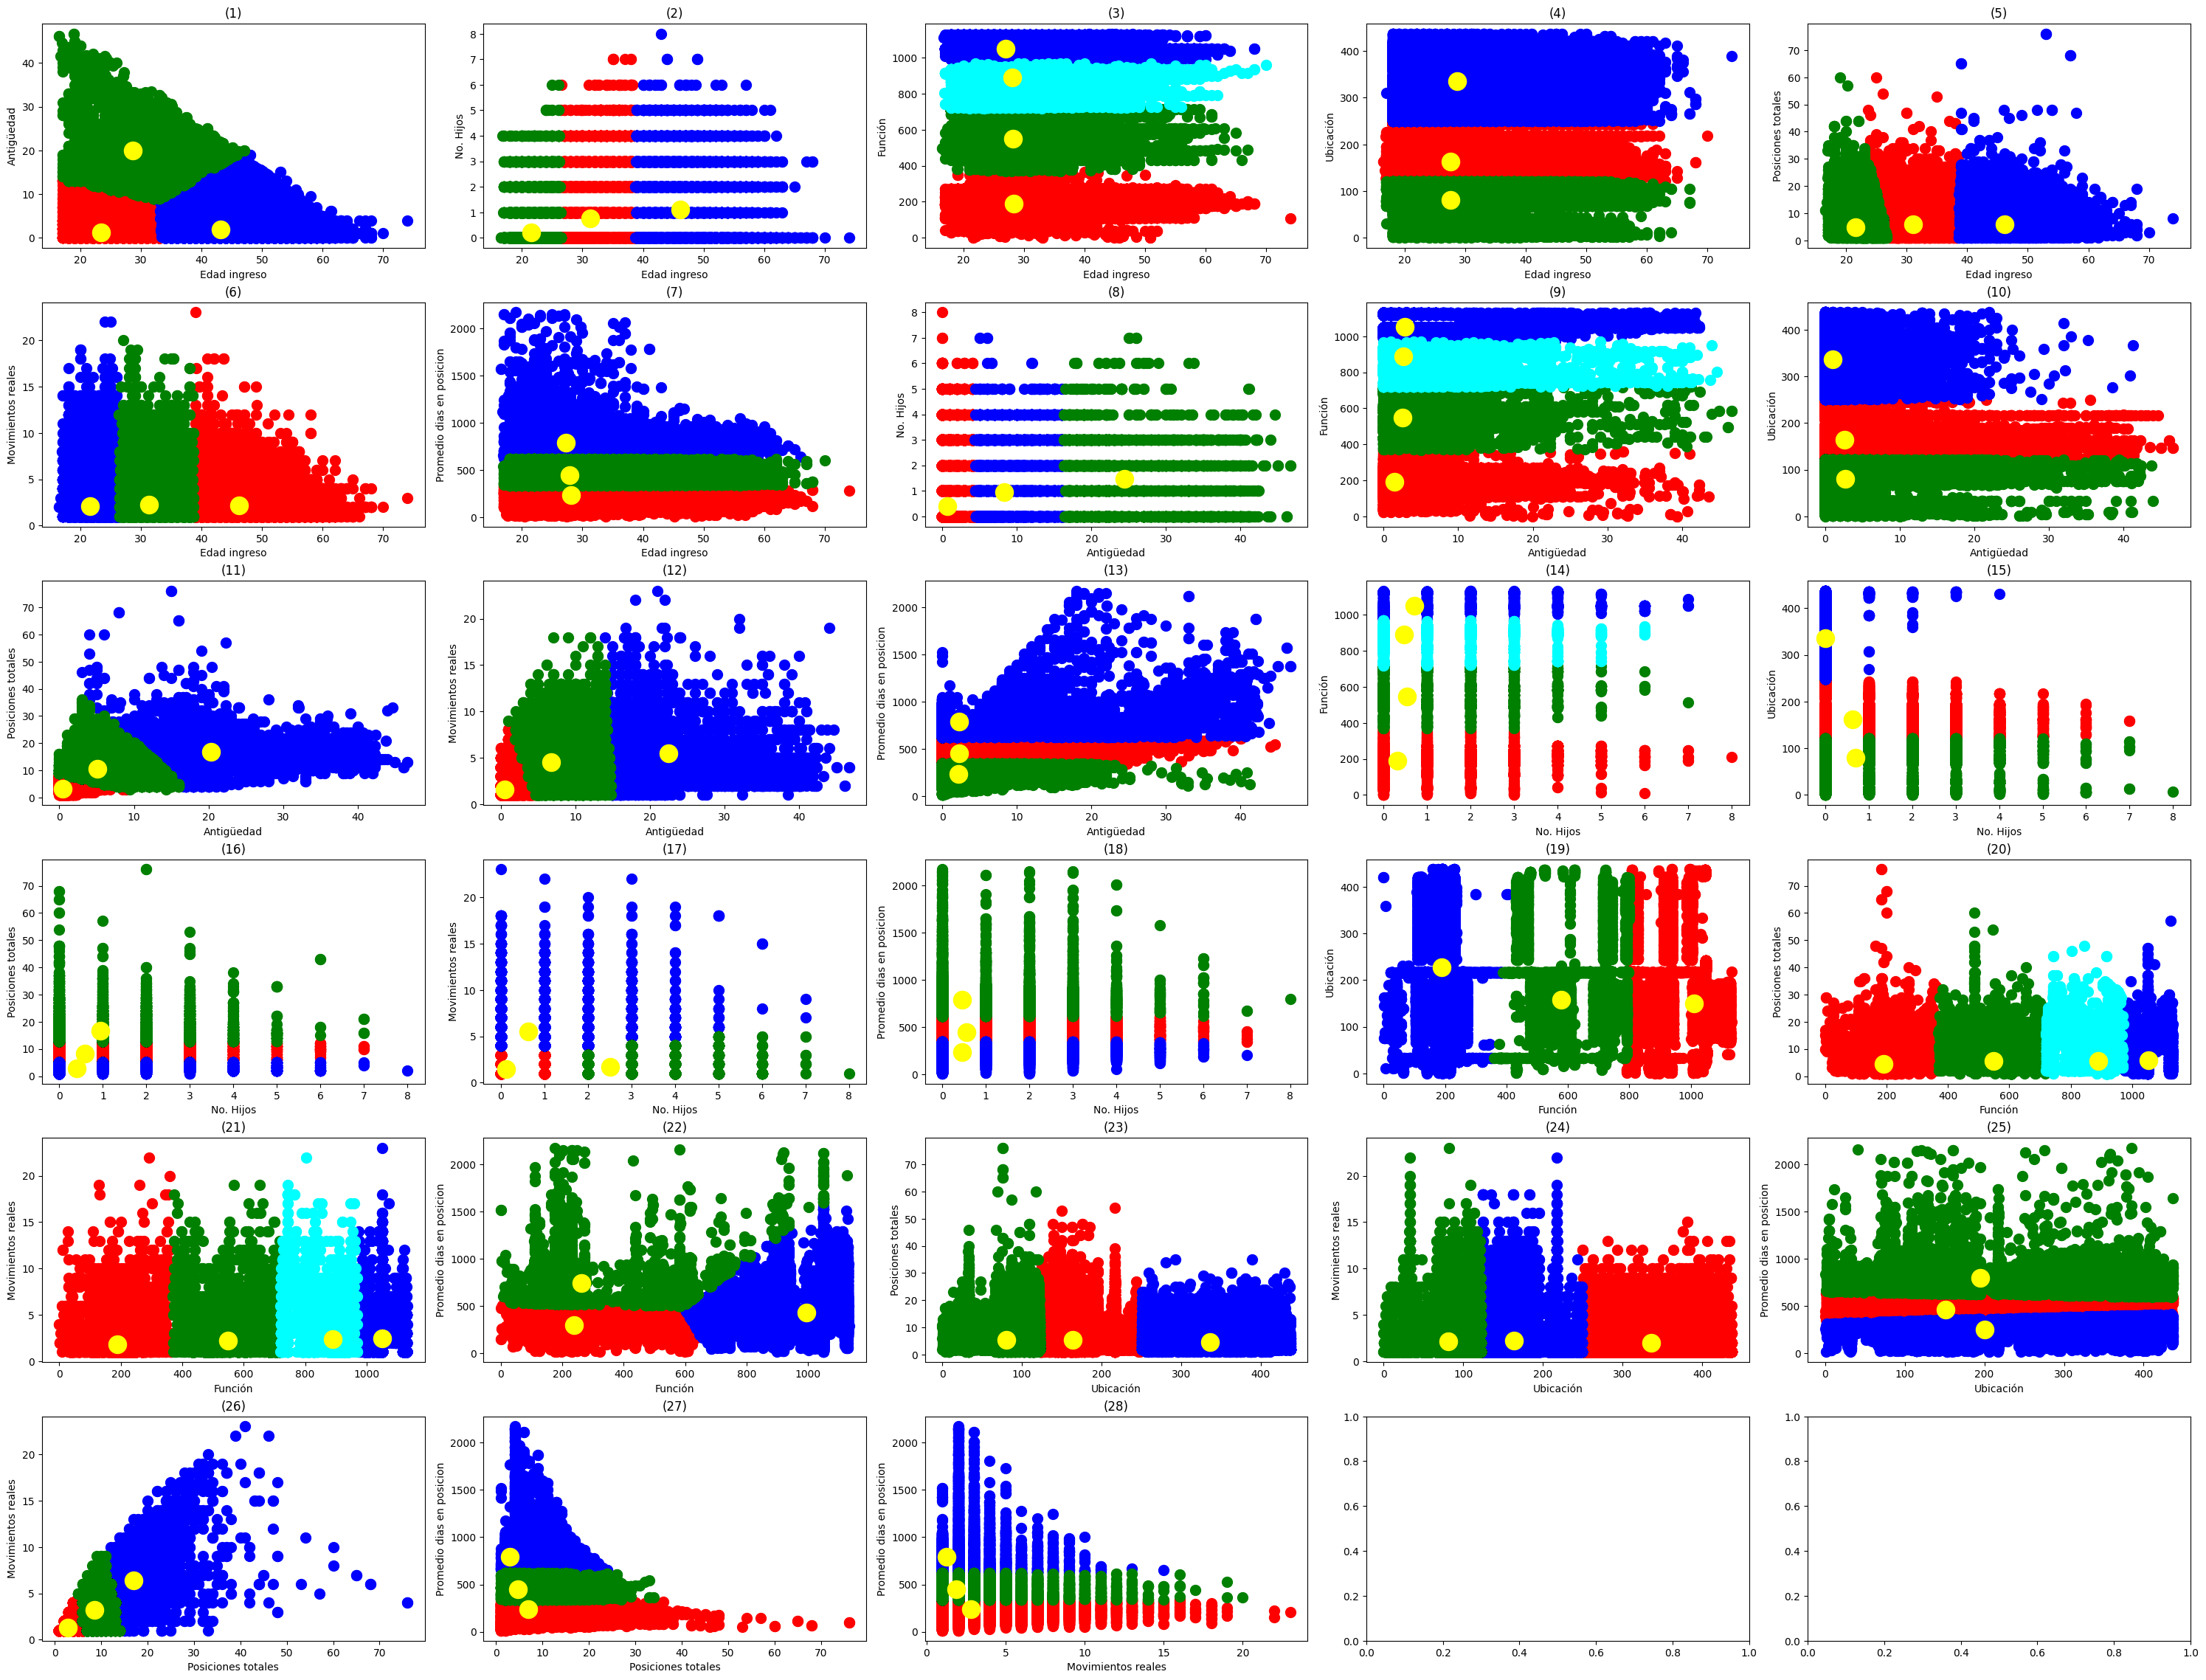

In [9]:
def seeClusters(df):
    
    # Definicion de combinaciones de atributos
    number_of_atributes = len(df.columns)
    numbers = list(range(0, number_of_atributes))
    permutations = list(itertools.combinations(numbers, 2))
    column_names = df.columns

    colors = ['red', 'blue', 'green', 'cyan', 'magenta', 'orange']

    #Ajuste subplots
    n_cols = 5
    if len(permutations) % n_cols == 0:
        n_rows = len(permutations) // n_cols
    else:
        n_rows = (len(permutations) // n_cols) + 1
    n_subplots = n_cols * n_rows

    # Creación de la figura
    fig, axes = plt.subplots(n_rows, n_cols, figsize = (30, 25))
    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    row_key = 0
    col_key = 0

    for i in range(0, len(permutations)):

        # Selección de datos
        X = df.iloc[:, [permutations[i][0], permutations[i][1]]].values

        wcss = []

        for j in range(1, 6):
            kmeans = KMeans(n_clusters = j, init = 'k-means++', random_state = 42)
            kmeans.fit(X)
            wcss.append(kmeans.inertia_)

        # Calculate the percentage change in WCSS
        percentage_change = [100 * (wcss[j] - wcss[j - 1]) / wcss[j - 1] for j in range(1, len(wcss))]

        elbow_point = 2

        for j in range(1, len(percentage_change)):
            if abs(percentage_change[j])  <  55:
                elbow_point = j + 2
                break

        # Definicion del número de clusters de acuerdo al método del codo
        n_clusters = elbow_point

        kmeans = KMeans(n_clusters = n_clusters, init = 'k-means++', random_state = 42)
        y_means = kmeans.fit_predict(X)

        # Figura
        ax = axes[row_key, col_key]

        for j in range(0, n_clusters):
            ax.scatter(X[y_means == j, 0], X[y_means == j, 1], s = 100, c = colors[j], label = f'Cluster {j}')
            
        ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroides')

        #ax.set_title(f'Cols: {permutations[i][0]} & {permutations[i][1]}')
        ax.set_title(f'({i + 1})')
        ax.set_xlabel(column_names[permutations[i][0]])
        ax.set_ylabel(column_names[permutations[i][1]])

        if col_key < n_cols - 1:
            col_key += 1
        elif col_key <= n_cols - 1:
            col_key = 0
            row_key += 1

    
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

seeClusters(df)